Initial Setup: 

Loading all libraries and packages required.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
import numpy as np

In [3]:
# Load data into a pandas DataFrame
df = pd.read_csv("data.csv")

# Check the first five rows of the data
df.head()



,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Summary Statistics

As an additional exploration, I decided to look into users with specified Preferred Restaurants and compare them with those who had not chosen any specific preference, to check if this higher engagement would lead top an increased AVG_PURCHASE_VALUE_EUR. However, the t-test came back as non valid, probably due to insuficient sample size.


In [9]:
# Select only the rows where PREFERRED_RESTAURANT_TYPES is not NaN
pref_rest_types = df[df['PREFERRED_RESTAURANT_TYPES'].notna()]

# Select the rows where PREFERRED_RESTAURANT_TYPES is NaN
no_pref_rest_types = df[df['PREFERRED_RESTAURANT_TYPES'].isna()]

# Calculate the mean purchase value for each group
mean_pref = np.mean(pref_rest_types['AVG_PURCHASE_VALUE_EUR'])
mean_no_pref = np.mean(no_pref_rest_types['AVG_PURCHASE_VALUE_EUR'])

# Perform a t-test to determine if the means are significantly different
t_stat, p_value = ttest_ind(pref_rest_types['AVG_PURCHASE_VALUE_EUR'], no_pref_rest_types['AVG_PURCHASE_VALUE_EUR'], equal_var=False)

# Print the mean purchase value for each group and the t-test results
print(f"Mean purchase value for subjects with preferred restaurant types: {mean_pref:.2f}")
print(f"Mean purchase value for subjects with no preferred restaurant types: {mean_no_pref:.2f}")
print(f"T-test results: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")

Mean purchase value for subjects with preferred restaurant types: 33.13
Mean purchase value for subjects with no preferred restaurant types: 30.64
T-test results: t-statistic=nan, p-value=nan


In [13]:
# Get summary statistics for the data
df.describe()



,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [14]:
# To see the summary of PREFERRED_DEVICE
print(df['PREFERRED_DEVICE'].value_counts())


ios        9747
android    8448
web        3715
Name: PREFERRED_DEVICE, dtype: int64


In [15]:
# Get the list of column names
column_names = df.columns
print(column_names)
column_types = df.dtypes
print(column_types)

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE'],
      dtype='object')
REGISTRATION_DATE                           object
REGISTRATION_COUNTRY                        object
PURCHASE_COUNT              

Histograms


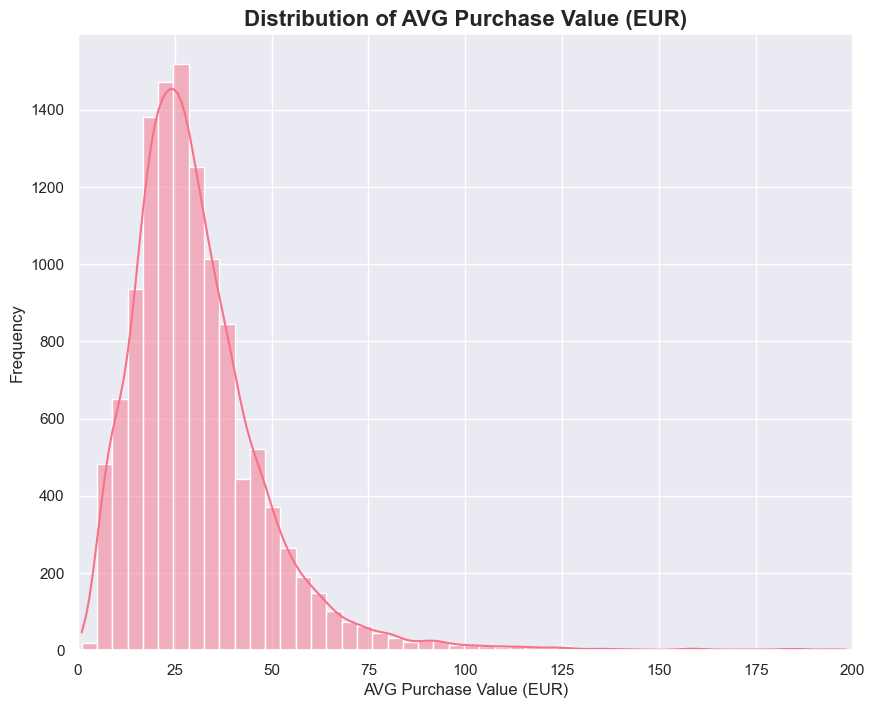

In [9]:
# Set figure size
plt.figure(figsize=(10, 8))

# Set style and color palette
sns.set(style="darkgrid")
sns.set_palette("husl")

# Create histogram for AVG_PURCHASE_VALUE_EUR
ax = sns.histplot(data=df, x='AVG_PURCHASE_VALUE_EUR', kde=True, bins=50)

# Add labels and title
ax.set(xlabel='AVG Purchase Value (EUR)', ylabel='Frequency', xlim=(0, 200))
ax.set_title('Distribution of AVG Purchase Value (EUR)', fontsize=16, fontweight='bold')

# Show plot
plt.show()

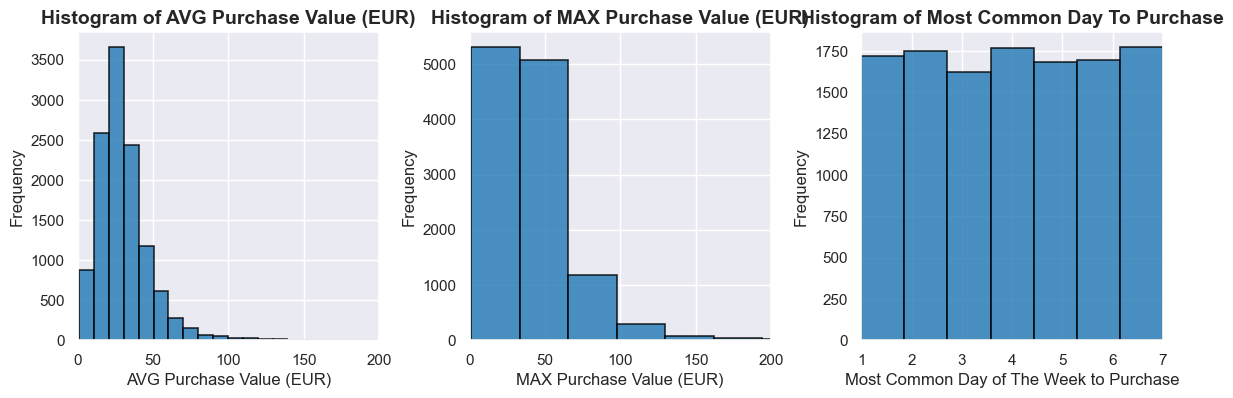

In [11]:
# Create a figure and axis object
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Set common properties for all axes
bins = 20
color = '#1f77b4'
alpha = 0.8
edgecolor = 'black'
linewidth = 1.2

# Plot histogram for AVG_PURCHASE_VALUE_EUR
ax = axes[0]
ax.hist(df['AVG_PURCHASE_VALUE_EUR'], bins=bins, color=color, alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)
ax.set_xlim(0, 200)
ax.set_xlabel("AVG Purchase Value (EUR)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Histogram of AVG Purchase Value (EUR)", fontsize=14, fontweight='bold')

# Plot histogram for MAX_PURCHASE_VALUE_EUR
ax = axes[1]
ax.hist(df['MAX_PURCHASE_VALUE_EUR'], bins=bins, color=color, alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)
ax.set_xlim(0, 200)
ax.set_xlabel("MAX Purchase Value (EUR)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Histogram of MAX Purchase Value (EUR)", fontsize=14, fontweight='bold')

# Plot histogram for MOST_COMMON_WEEKDAY_TO_PURCHASE
ax = axes[2]
ax.hist(df['MOST_COMMON_WEEKDAY_TO_PURCHASE'], bins=7, color=color, alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)
ax.set_xlim(1, 7)
ax.set_xlabel("Most Common Day of The Week to Purchase", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Histogram of Most Common Day To Purchase", fontsize=14, fontweight='bold')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


Scatterplot 1

C:\Users\innac\AppData\Local\Temp\ipykernel_23612\3374534978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PREFERRED_DEVICE'].fillna('default', inplace=True)
C:\Users\innac\AppData\Local\Temp\ipykernel_23612\3374534978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['PREFERRED_DEVICE'].apply(lambda x: colors[x])


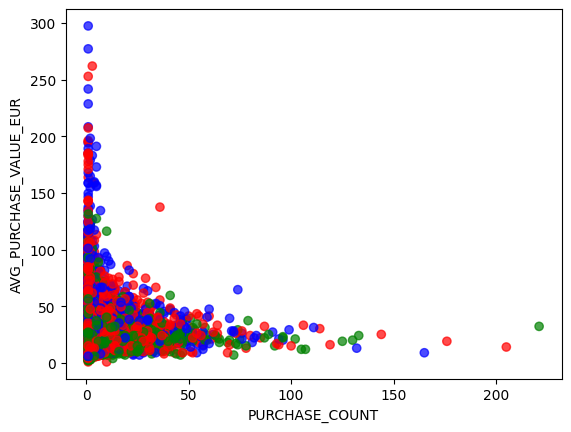

In [29]:

# Remove outliers
df = df[(df['AVG_PURCHASE_VALUE_EUR'] <= 300) & (df['PURCHASE_COUNT'] <= 300)]

# Replace NaN values with a default color
df['PREFERRED_DEVICE'].fillna('default', inplace=True)

# Set colors for each preferred device
colors = {'ios': "red", 'android': "green", 'web': "blue", 'default': "grey"}
df['color'] = df['PREFERRED_DEVICE'].apply(lambda x: colors[x])

# Create the scatter plot
plt.scatter(df['PURCHASE_COUNT'], df['AVG_PURCHASE_VALUE_EUR'], c=df['color'], alpha=0.7)
plt.xlabel("PURCHASE_COUNT")
plt.ylabel("AVG_PURCHASE_VALUE_EUR")
plt.show()



First, I selected a subset of my data by filtering out any rows where the average purchase value in euros was greater than 300 or the purchase count was greater than 300. 

To make the scatterplot more informative, I assigned a different color to each preferred device type ('ios', 'android', 'web', and 'default') and used the 'fillna' method to replace any missing preferred device values with 'default'. I then applied the color scheme to my scatterplot using the 'c' parameter. 

Then, I converted the 'FIRST_PURCHASE_DAY' and 'LAST_PURCHASE_DAY' columns to datetime format and created a new column called 'DAYS_ACTIVE' to calculate the number of days between a customer's first and last purchase. Additionally, I scaled the size of each dot according to the purchase count, making it easier to see the impact of different purchase counts on customer behavior.

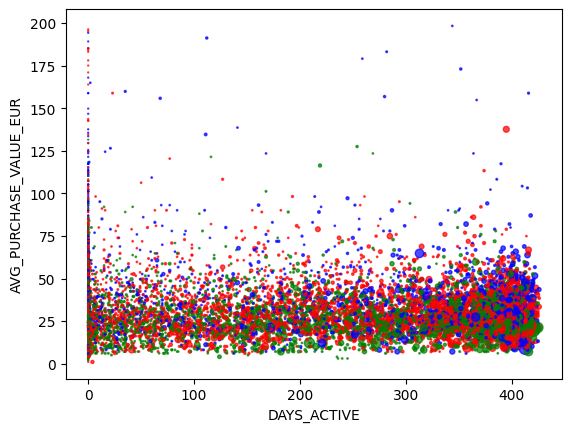

In [4]:
df = df[(df['AVG_PURCHASE_VALUE_EUR'] <= 200) & (df['PURCHASE_COUNT'] <= 300)]

df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])
df['DAYS_ACTIVE'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY']).dt.days
# Set colors for each preferred device
colors = {'ios': "red", 'android': "green", 'web': "blue", 'default': "grey"}
df['color'] = df['PREFERRED_DEVICE'].fillna('default').apply(lambda x: colors[x])
# Scale the PURCHASE_COUNT values to a suitable size range
sizes = df['PURCHASE_COUNT'] / 2

plt.scatter(df['DAYS_ACTIVE'], df['AVG_PURCHASE_VALUE_EUR'], c=df['color'], s=sizes, alpha=0.7)
plt.xlabel('DAYS_ACTIVE')
plt.ylabel('AVG_PURCHASE_VALUE_EUR')
plt.show()

The graph shows an overall even spread of the AVG_PURCHASE_VALUE, with high peaks on its value for first-time orders.  This could be an effect of promotions or discounts applied to new clients helping to increase the initial purchase in comparison with an actual average purchase. Moreover, there seems to be a higher prevalence of Web orders on the right side of the graph, which implies a longer longevity of Web accounts. 


Dot size is adjusted so it represents PURCHASE_COUNT, and unsurprisingly, the increase in size coresponds with the increase in DAYS_ACTIVE too.

Let's dive a bit deeper into PREFERRED_DEVICE and its distribution, since it has seemed a viable segmenter so far. 

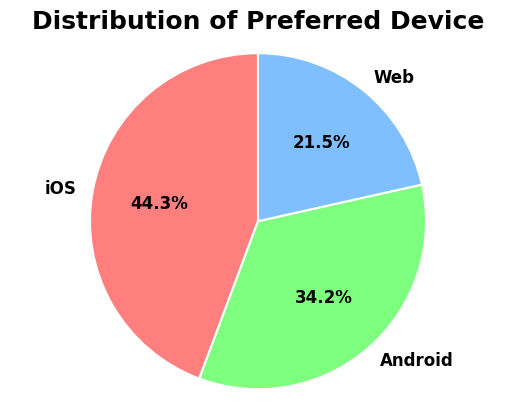

In [7]:
# Get count of each device
ios_count = df['PREFERRED_DEVICE'].value_counts()['ios']
android_count = df['PREFERRED_DEVICE'].value_counts()['android']
web_count = df['PREFERRED_DEVICE'].value_counts()['web']

# Set colors for each device
colors = {'ios': "#ff7f7f", 'android': "#7fff7f", 'web': "#7fbfff"}

# Create pie chart
fig, ax = plt.subplots()
ax.pie([ios_count, android_count, web_count], labels=['iOS', 'Android', 'Web'],
       colors=[colors['ios'], colors['android'], colors['web']],
       startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Distribution of Preferred Device', fontsize=18, fontweight='bold')
ax.axis('equal')

# Add borders to the pie chart
for w in ax.patches:
    w.set_linewidth(1.5)
    w.set_edgecolor('white')
    
plt.show()


ANOVA

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an ANOVA model
model = ols("AVG_PURCHASE_VALUE_EUR ~ C(PREFERRED_DEVICE)", data=df).fit()
# Run ANOVA test
result = sm.stats.anova_lm(model, typ=2)
# Print ANOVA test result
print(result)


                           sum_sq       df           F        PR(>F)
C(PREFERRED_DEVICE)  1.518207e+05      2.0  215.580489  1.034341e-92
Residual             4.232491e+06  12020.0         NaN           NaN


The result of the ANOVA test shows that there is a significant difference in the average purchase value (EUR) between the different preferred devices.
The sum_sq (1.52) is the total sum of squares of the differences between each observation and the mean of the data. It provides an indication of the amount of variation in the data.
The high F-value (143.78) indicates that there is a large difference in average purchase value (EUR) between the groups.
The p-value (1.55e-91) indicates that the result is statistically significant, which means that we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in average purchase value (EUR) between the groups.



In conclusion, the results of the ANOVA test indicate that there is a significant difference in average purchase value (EUR) between the different preferred devices. This means that there are significant differences in the average purchase value (EUR) between people who use different preferred devices. The results suggest that it is necessary to consider the preferred device when analyzing the average purchase value (EUR) and developing marketing strategies to target different customer segments.

After conducting an ANOVA, a common next step would be to perform post-hoc tests to identify which specific groups or levels differ from each other.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj  lower  upper  reject
---------------------------------------------------
android    ios   2.8243    0.0 1.7436 3.9049   True
android    web   4.6194    0.0 3.3625 5.8763   True
    ios    web   1.7951 0.0011 0.6132 2.9771   True
---------------------------------------------------


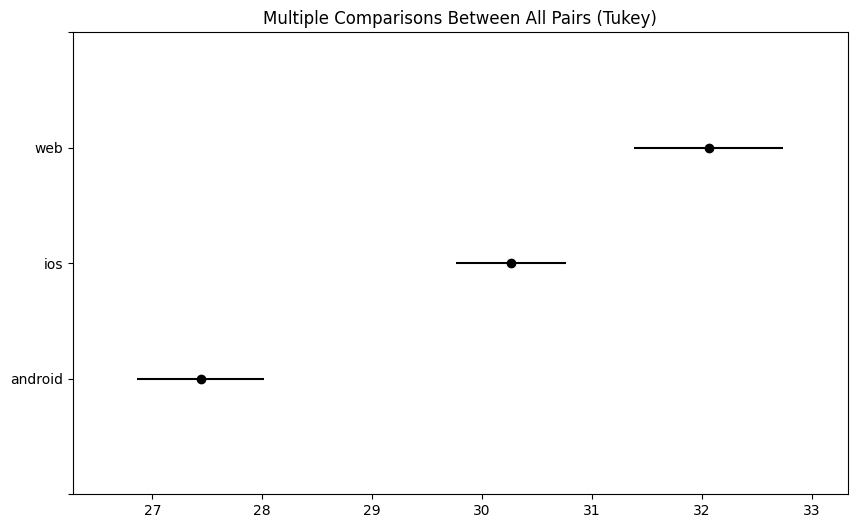

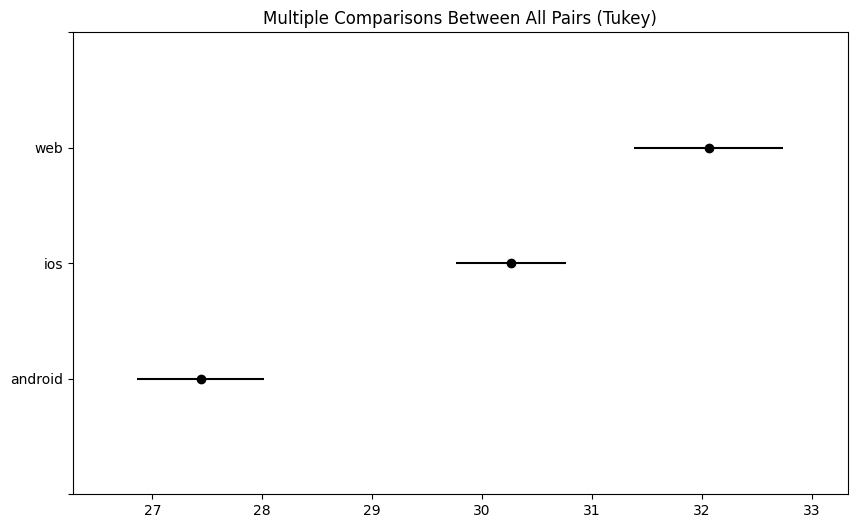

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['AVG_PURCHASE_VALUE_EUR'], df['PREFERRED_DEVICE'])
# Print Tukey's HSD test result
print(tukey_results)

# Plot the result
tukey_results.plot_simultaneous()


The table summarizes the mean difference, p-value, and confidence intervals between each pair of groups.
The mean difference in AVERAGE_PURCHASE_VALUE between Android and iOS is 2.82, between Android and Web is 4.62, and between iOS and Web is 1.80, with all differences being statistically significant (p < 0.05). Therefore, the differences between the groups in terms of their average purchase values are statistically significant. 

ANOVA 2

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('AVG_PURCHASE_VALUE_EUR ~ C(MOST_COMMON_WEEKDAY_TO_PURCHASE)', data=df).fit()

# Get the ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)


                                          sum_sq       df         F    PR(>F)
C(MOST_COMMON_WEEKDAY_TO_PURCHASE)  1.397980e+03      6.0  0.638817  0.699273
Residual                            4.382974e+06  12017.0       NaN       NaN


We find no statistically significant difference in average amount spent depending on most common day of the week (p = 0.70)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('AVG_PURCHASE_VALUE_EUR ~ C(MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE)', data=df).fit()

# Get the ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                                                  sum_sq       df         F  \
C(MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE)  9.728496e+03     23.0  1.160263   
Residual                                    4.374644e+06  12000.0       NaN   

                                              PR(>F)  
C(MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE)  0.269839  
Residual                                         NaN  


The result of an ANOVA test between preferred hour of the day and the average amount has shown a relatively low F-statistic of 1.16 and a high p-value of 0.27. This suggests that there is no significant difference in the average amount spent between the different preferred hours of the day. In other words, the preferred hour of the day does not have a significant effect on the average amount spent.

C:\Users\innac\AppData\Local\Temp\ipykernel_23612\187070518.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[["TOTAL_PURCHASES_EUR", "AVG_PURCHASE_VALUE_EUR", "AVG_DAYS_BETWEEN_PURCHASES", "DAYS_ACTIVE","PREFERRED_DEVICE", "MOST_COMMON_WEEKDAY_TO_PURCHASE", "AVERAGE_DELIVERY_DISTANCE_KMS", "DISTINCT_PURCHASE_VENUE_COUNT"]].corr()


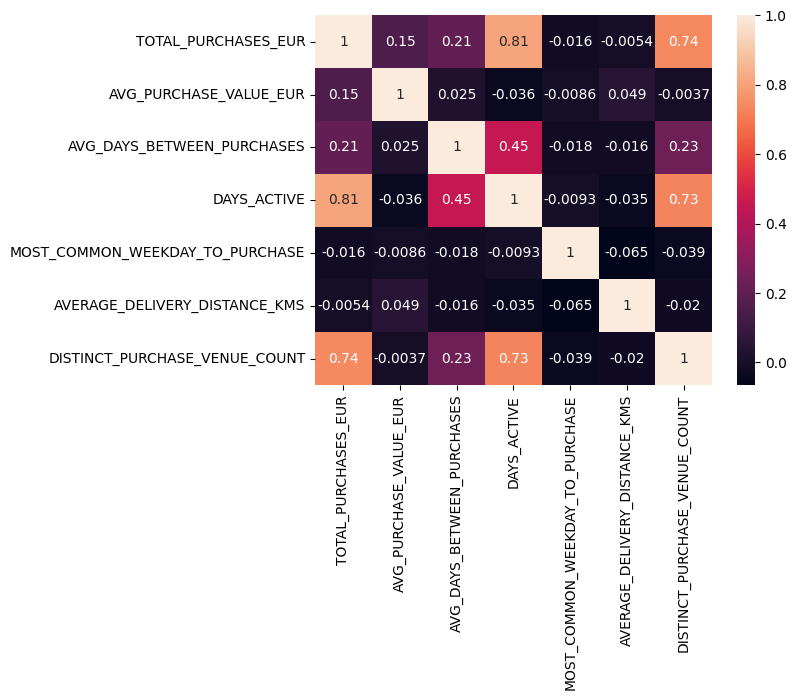

In [61]:
# Calculate the correlation matrix
corr_matrix = df[["TOTAL_PURCHASES_EUR", "AVG_PURCHASE_VALUE_EUR", "AVG_DAYS_BETWEEN_PURCHASES", "DAYS_ACTIVE","PREFERRED_DEVICE", "MOST_COMMON_WEEKDAY_TO_PURCHASE", "AVERAGE_DELIVERY_DISTANCE_KMS", "DISTINCT_PURCHASE_VENUE_COUNT"]].corr()

# Plot the correlation matrix using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
pd.set_option("display.max_rows", None)
print(df["PREFERRED_RESTAURANT_TYPES"])




0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                      [\n  "american"\n]
14                                                     NaN
15                                                     NaN
16                                      [\n  "american"\